### Future
### 0: Red candle
### 1: Equal Candle
### 2: Green candle


In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/HP/Desktop/Binary_bots/Untitled Folder/EURUSD1.csv")
df = df.dropna()
df["Future"] = df["Future"].astype(int)

df

,Future,open,high,low,close,volume
0,0,1.16062,1.16070,1.16061,1.16067,13
1,0,1.16067,1.16069,1.16048,1.16049,31
2,1,1.16050,1.16055,1.16047,1.16048,23
3,0,1.16048,1.16050,1.16047,1.16048,38
4,2,1.16050,1.16052,1.16037,1.16038,56
...,...,...,...,...,...,...
64995,0,1.13158,1.13158,1.13155,1.13155,3
64996,0,1.13156,1.13156,1.13153,1.13153,3
64997,0,1.13154,1.13154,1.13151,1.13153,4
64998,2,1.13153,1.13153,1.13134,1.13135,15


In [2]:
df['MA_2'] = df['close'].rolling(window = 2).mean() #moving average 20
df['MA_5'] = df['close'].rolling(window = 5).mean() #moving average 50
df['MA_20'] = df['close'].rolling(window = 20).mean() #moving average 50

df['EMA_2'] = df['close'].ewm(span = 2, adjust = False).mean() #exponential moving average
df['EMA_5'] = df['close'].ewm(span = 5, adjust = False).mean()
df['EMA_20'] = df['close'].ewm(span = 20, adjust = False).mean()
df

,Future,open,high,low,close,volume,MA_2,MA_5,MA_20,EMA_2,EMA_5,EMA_20
0,0,1.16062,1.16070,1.16061,1.16067,13,NaN,NaN,NaN,1.160670,1.160670,1.160670
1,0,1.16067,1.16069,1.16048,1.16049,31,1.160580,NaN,NaN,1.160550,1.160610,1.160653
2,1,1.16050,1.16055,1.16047,1.16048,23,1.160485,NaN,NaN,1.160503,1.160567,1.160636
3,0,1.16048,1.16050,1.16047,1.16048,38,1.160480,NaN,NaN,1.160488,1.160538,1.160621
4,2,1.16050,1.16052,1.16037,1.16038,56,1.160430,1.160500,NaN,1.160416,1.160485,1.160598
...,...,...,...,...,...,...,...,...,...,...,...,...
64995,0,1.13158,1.13158,1.13155,1.13155,3,1.131565,1.131492,1.131333,1.131547,1.131502,1.131351
64996,0,1.13156,1.13156,1.13153,1.13153,3,1.131540,1.131526,1.131356,1.131536,1.131511,1.131368
64997,0,1.13154,1.13154,1.13151,1.13153,4,1.131530,1.131532,1.131378,1.131532,1.131517,1.131384
64998,2,1.13153,1.13153,1.13134,1.13135,15,1.131440,1.131508,1.131391,1.131411,1.131462,1.131380


In [3]:
from talib.abstract import *
#Momentum indicator
adx = ADX(df['high'], df['low'], df['close'], timeperiod=14)
df['adx'] = pd.Series(adx)

adxr = ADXR(df['high'], df['low'], df['close'], timeperiod=14)
df['adxr'] = pd.Series(adxr)

apo = APO(df['close'], fastperiod=12, slowperiod=26, matype=0)
df['apo'] = pd.Series(apo)

aroondown, aroonup = AROON(df['high'], df['low'], timeperiod=14)
df['aroondown'] = pd.Series(aroondown)
df['aroonup'] = pd.Series(aroonup)

aroonosc = AROONOSC(df['high'], df['low'], timeperiod=14)
df['aroonosc'] = pd.Series(aroonosc)

bop = BOP(df['open'], df['high'], df['low'], df['close'])
df['bop'] = pd.Series(bop)

cci = CCI(df['high'], df['low'], df['close'], timeperiod=14)
df['cci'] = pd.Series(cci)

cmo = CMO(df['close'], timeperiod=14)
df['cmo'] = pd.Series(cmo)

dx = DX(df['high'], df['low'], df['close'], timeperiod=14)
df['dx'] = pd.Series(dx)

macd, macdsignal, macdhist = MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = pd.Series(macd)
df['macdsignal'] = pd.Series(macdsignal)
df['macdhist'] = pd.Series(macdhist)

mfi = MFI(df['high'], df['low'], df['close'],  df['volume'], timeperiod=14)
df['mfi'] = pd.Series(mfi)

minus_di = MINUS_DI(df['high'], df['low'], df['close'], timeperiod=14)
df['minus_di'] = pd.Series(minus_di)

minus_dm = MINUS_DM(df['high'], df['low'], timeperiod=14)
df['minus_dm'] = pd.Series(minus_di)

mom = MOM(df['close'], timeperiod=10)
df['mom'] = pd.Series(mom)

roc = ROC(df['close'], timeperiod=10)
df['roc'] = pd.Series(roc)

rocp = ROCP(df['close'], timeperiod=10)
df['rocp'] = pd.Series(rocp)

rocr = ROCR(df['close'], timeperiod=10)
df['rocr'] = pd.Series(rocr)

rsi = RSI(df['close'], timeperiod=14)
df['rsi'] = pd.Series(rsi)

slowk, slowd = STOCH(df['high'], df['low'], df['close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df['slowk'] = pd.Series(slowk)
df['slowd'] = pd.Series(slowd)

fastk, fastd = STOCHF(df['high'], df['low'], df['close'], fastk_period=5, fastd_period=3, fastd_matype=0)
df['fastk'] = pd.Series(fastk)
df['fastd'] = pd.Series(fastd)

ultosc = ULTOSC(df['high'], df['low'], df['close'], timeperiod1=7, timeperiod2=14, timeperiod3=28)
df['ultosc'] = pd.Series(ultosc)

In [4]:
#Pattern Recognition
cdl2crows = CDL2CROWS(df['open'], df['high'], df['low'], df['close'])
df['cdl2crows'] = pd.Series(cdl2crows)

cdl3blackcrows = CDL3BLACKCROWS(df['open'], df['high'], df['low'], df['close'])
df['cdl3blackcrows'] = pd.Series(cdl3blackcrows)

cdl3inside = CDL3INSIDE(df['open'], df['high'], df['low'], df['close'])
df['cdl3inside'] = pd.Series(cdl3inside)

cdl3linestrike = CDL3LINESTRIKE(df['open'], df['high'], df['low'], df['close'])
df['cdl3linestrike'] = pd.Series(cdl3linestrike)

cdl3outside = CDL3OUTSIDE(df['open'], df['high'], df['low'], df['close'])
df['cdl3outside'] = pd.Series(cdl3outside)

cdl3starsinsouth = CDL3STARSINSOUTH(df['open'], df['high'], df['low'], df['close'])
df['cdl3starsinsouth'] = pd.Series(cdl3starsinsouth)

cdl3whitesoldiers = CDL3WHITESOLDIERS(df['open'], df['high'], df['low'], df['close'])
df['cdl3whitesoldiers'] = pd.Series(cdl3whitesoldiers)



In [5]:
df = df.dropna()
df

,Future,open,high,low,close,volume,MA_2,MA_5,MA_20,EMA_2,...,fastk,fastd,ultosc,cdl2crows,cdl3blackcrows,cdl3inside,cdl3linestrike,cdl3outside,cdl3starsinsouth,cdl3whitesoldiers
40,1,1.16006,1.16006,1.16003,1.16005,16,1.160055,1.160068,1.160289,1.160057,...,25.000000,23.571429,36.243484,0,0,0,0,0,0,0
41,1,1.16005,1.16005,1.16003,1.16005,25,1.160050,1.160068,1.160263,1.160052,...,25.000000,20.000000,42.284325,0,0,0,0,0,0,0
42,2,1.16006,1.16007,1.16004,1.16006,19,1.160055,1.160064,1.160233,1.160057,...,37.500000,29.166667,47.592810,0,0,0,0,0,0,0
43,0,1.16006,1.16012,1.15999,1.16012,41,1.160090,1.160068,1.160206,1.160099,...,100.000000,54.166667,64.166638,0,0,0,0,0,0,0
44,2,1.16012,1.16012,1.16008,1.16009,8,1.160105,1.160074,1.160177,1.160093,...,76.923077,71.474359,62.542259,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,0,1.13158,1.13158,1.13155,1.13155,3,1.131565,1.131492,1.131333,1.131547,...,84.000000,87.456635,57.533455,0,0,0,0,0,0,0
64996,0,1.13156,1.13156,1.13153,1.13153,3,1.131540,1.131526,1.131356,1.131536,...,71.428571,83.993432,61.275002,0,0,0,0,0,0,0
64997,0,1.13154,1.13154,1.13151,1.13153,4,1.131530,1.131532,1.131378,1.131532,...,66.666667,74.031746,64.184678,0,0,0,0,0,0,0
64998,2,1.13153,1.13153,1.13134,1.13135,15,1.131440,1.131508,1.131391,1.131411,...,4.000000,47.365079,51.311297,0,0,0,0,0,0,0


In [6]:
df.shape

(64960, 45)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Future',axis=1),  df['Future'], test_size=0.3)
x2 = x_train[:45000]

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
train_x = np.array(x_train)
train_y = np.asarray(y_train)

In [10]:
x2 = x_train[:45000]


In [22]:
y2 =y_train[:45000]

In [11]:
x2 = train_x[:45000]
x2.shape

(45000, 44)

In [12]:
x2.shape

(45000, 44)

In [38]:
x_test.shape

(19488, 44)

In [39]:
x_test2 = x_test[:19400]
x_test2 = x_test2.reshape(-1, 44, x_test2.shape[0])

# y_train = y_train.reshape(1, y_train.shape[0], y_train.shape[1])

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
import numpy as np
x2 = x2.reshape(-1, 44, x2.shape[0])
# y_train = y_train.reshape(1, y_train.shape[0], y_train.shape[1])
earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = Sequential()
model.add(LSTM(128, input_shape=(50,44), return_sequences=True))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 50, 128)           88576     
Total params: 88,576
Trainable params: 88,576
Non-trainable params: 0
_________________________________________________________________


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization

LEARNING_RATE = 0.001 #isso mesmo
EPOCHS = 50  # how many passes through our data #20 was good
BATCH_SIZE = 128  # how many batches? Try smaller batch if you're getting OOM (out of memory) errors.

earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = Sequential()
model.add(LSTM(128, input_shape=(50,44), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())
print('...')
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE, decay=5e-5)
    
# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
model.summary()

# tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# Train model
history = model.fit(
    x2, y2,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    
)

...
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 50, 128)           88576     
_________________________________________________________________
dropout_20 (Dropout)         (None, 50, 128)           0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 50, 128)           512       
_________________________________________________________________
lstm_19 (LSTM)               (None, 50, 128)           131584    
_________________________________________________________________
dropout_21 (Dropout)         (None, 50, 128)           0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 50, 128)           512       
_________________________________________________________________
lstm_20 (LSTM)               (None, 128)          

ValueError: in user code:

    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:224 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_8: expected shape=(None, None, 44), found shape=[None, 44, 1]


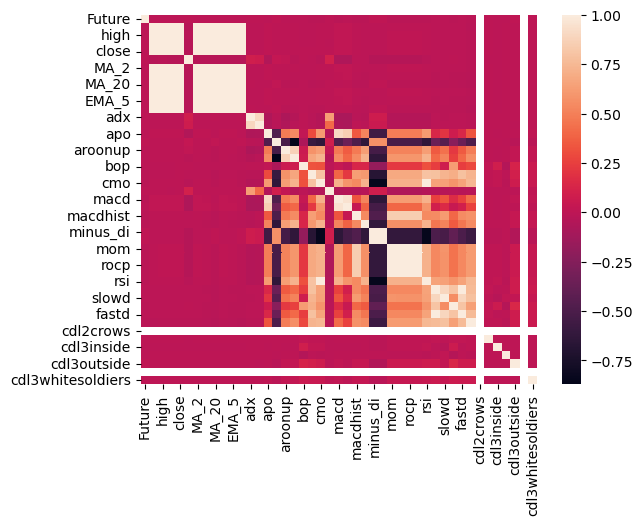